# Up-to-date liquor data
This is a cursory analysis of the Iowa State Liquor data 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Some light data cleaning

In [3]:
# Loading in the small version, uncomment below for full
# df = pd.read_csv('Data/Iowa_Liquor_Sales.csv')
df = pd.read_csv('Data/Iowa_Liquor_Sales_Small.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

df.drop('Volume Sold (Gallons)', axis=1, inplace=True) # Already have in litres
df.drop('Invoice/Item Number', axis=1, inplace=True) # Not significant
df.drop('Store Number', axis=1, inplace=True) # Not significant
df.drop('Vendor Number', axis=1, inplace=True) # Not significant
df.drop('Address', axis=1, inplace=True) # Can reverse from zip+store location


In [4]:
#rename the columns
cols = [
    'date', 'store', 'city', 'zip', 'store_location', 'county_num', 'county', 'cat', 
    'cat_name', 'vendor', 'item_num', 'item', 'pack_size', 'bottle_vol', 'bottle_cost',
    'bottle_cost_retail', 'bottles_sold', 'sales', 'volume_sold'
]
df.columns = cols

In [5]:
df.columns

Index(['date', 'store', 'city', 'zip', 'store_location', 'county_num',
       'county', 'cat', 'cat_name', 'vendor', 'item_num', 'item', 'pack_size',
       'bottle_vol', 'bottle_cost', 'bottle_cost_retail', 'bottles_sold',
       'sales', 'volume_sold'],
      dtype='object')

In [6]:
df.shape

(99999, 19)

## Exploration

In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

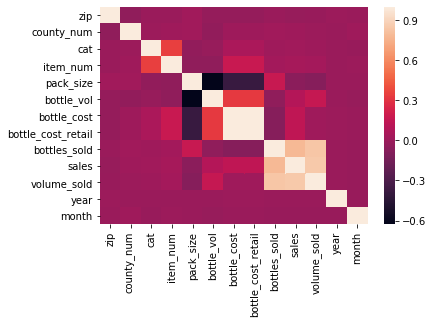

In [8]:
sns.heatmap(df.corr());

Next, I'm going to add the population data and see if that affects any metrics

In [9]:
pop = pd.read_csv('Data/Iowa_population_by_county.csv')
pop['CTYNAME'] = pop['CTYNAME'].map(lambda x: x.replace(' County', '').upper())
pop.columns = ['county', 'county_population', 'county_growth_rate'] 
pop = pop.drop('county_growth_rate', axis=1)
pop.head()

,county,county_population
0,POLK,487204
1,LINN,225909
2,SCOTT,173283
3,JOHNSON,151260
4,BLACK HAWK,132408


In [10]:
df_pop = pd.merge(df, pop, on='county')

df_pop = df_pop.drop('year', axis=1)

In [11]:
df_pop.head()

,date,store,city,zip,store_location,county_num,county,cat,cat_name,vendor,...,item,pack_size,bottle_vol,bottle_cost,bottle_cost_retail,bottles_sold,sales,volume_sold,month,county_population
0,2018-06-20,Wheatland Day Break,Wheatland,52777.0,POINT (-90.841518 41.82906),23.0,CLINTON,1062400.0,Spiced Rum,DIAGEO AMERICAS,...,Captain Morgan Spiced Rum Mini,12,500,4.80,7.20,1,7.20,0.50,6,46518
1,2018-06-20,Hy-Vee Food and Drug / Clinton,Clinton,52732.0,POINT (-90.193204 41.836268000000004),23.0,CLINTON,1031200.0,American Flavored Vodka,JEM Beverage Company,...,Western Son Blueberry Vodka Mini,6,50,4.83,7.25,4,29.00,0.20,6,46518
2,2018-06-20,Wal-Mart 2889 / Clinton,Clinton,52732.0,POINT (-90.245005 41.818874),23.0,CLINTON,1011400.0,Tennessee Whiskies,Brown Forman Corp.,...,Jack Daniels Old #7 Black Lbl,12,750,15.57,23.36,24,560.64,18.00,6,46518
3,2018-06-20,Hy-Vee Food and Drug / Clinton,Clinton,52732.0,POINT (-90.193204 41.836268000000004),23.0,CLINTON,1081200.0,Cream Liqueurs,DIAGEO AMERICAS,...,Godiva Liqueur,12,750,17.00,25.50,3,76.50,2.25,6,46518
4,2018-06-20,Sa Tobacco Liquor Mart,Clinton,52732.0,POINT (-90.193275 41.848124),23.0,CLINTON,1081300.0,American Cordials & Liqueur,Prestige Wine & Spirits Group,...,Kinky Liqueur,12,375,5.00,7.50,1,7.50,0.38,6,46518


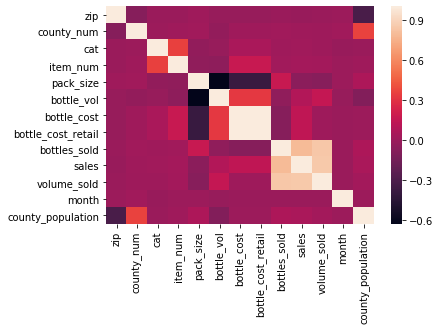

In [12]:
sns.heatmap(df_pop.corr());

In [13]:
df_pop.isnull().sum()
df_pop['cat_name'].unique()

array(['Spiced Rum', 'American Flavored Vodka', 'Tennessee Whiskies',
       'Cream Liqueurs', 'American Cordials & Liqueur',
       'Imported Brandies', 'American Vodkas', 'Canadian Whiskies',
       'Straight Bourbon Whiskies', 'Imported Vodkas', 'Blended Whiskies',
       'Single Malt Scotch', 'Cocktails /RTD', 'Whiskey Liqueur',
       'Scotch Whiskies', 'Coffee Liqueurs', '100% Agave Tequila',
       'Imported Cordials & Liqueurs', 'Imported Dry Gins',
       'Flavored Rum', 'Imported Distilled Spirit Specialty',
       'Irish Whiskies', 'American Brandies', 'White Rum',
       'Straight Rye Whiskies', 'Imported Flavored Vodka',
       'Temporary & Specialty Packages', 'American Dry Gins',
       'American Schnapps', 'Imported Schnapps', 'Gold Rum',
       'Single Barrel Bourbon Whiskies', 'Mixto Tequila', 'Triple Sec',
       'Aged Dark Rum', 'American Distilled Spirit Specialty',
       'Corn Whiskies', 'Neutral Grain Spirits', 'Iowa Distilleries', nan,
       'American Sloe Gin

In [14]:
top_categories = df_pop['cat_name'].value_counts()

In [15]:
tc = top_categories.to_dict()

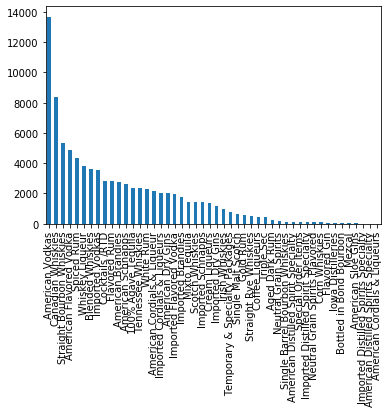

In [16]:
top_categories.plot.bar();

In [17]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [18]:
df_cats = df_pop.copy()
n = 15
top_n_cats = set(take(n, tc.keys()))
top_n_cats

{'100% Agave Tequila',
 'American Brandies',
 'American Flavored Vodka',
 'American Schnapps',
 'American Vodkas',
 'Blended Whiskies',
 'Canadian Whiskies',
 'Cocktails /RTD',
 'Flavored Rum',
 'Imported Vodkas',
 'Spiced Rum',
 'Straight Bourbon Whiskies',
 'Tennessee Whiskies',
 'Whiskey Liqueur',
 'White Rum'}

In [19]:
to_other = lambda x: x if x in top_n_cats else 'other' # Now it's just the top n categories + others (for one hot)
df_cats['cat_name'] = df_cats['cat_name'].map(to_other)

In [20]:
df_pop.head()

,date,store,city,zip,store_location,county_num,county,cat,cat_name,vendor,...,item,pack_size,bottle_vol,bottle_cost,bottle_cost_retail,bottles_sold,sales,volume_sold,month,county_population
0,2018-06-20,Wheatland Day Break,Wheatland,52777.0,POINT (-90.841518 41.82906),23.0,CLINTON,1062400.0,Spiced Rum,DIAGEO AMERICAS,...,Captain Morgan Spiced Rum Mini,12,500,4.80,7.20,1,7.20,0.50,6,46518
1,2018-06-20,Hy-Vee Food and Drug / Clinton,Clinton,52732.0,POINT (-90.193204 41.836268000000004),23.0,CLINTON,1031200.0,American Flavored Vodka,JEM Beverage Company,...,Western Son Blueberry Vodka Mini,6,50,4.83,7.25,4,29.00,0.20,6,46518
2,2018-06-20,Wal-Mart 2889 / Clinton,Clinton,52732.0,POINT (-90.245005 41.818874),23.0,CLINTON,1011400.0,Tennessee Whiskies,Brown Forman Corp.,...,Jack Daniels Old #7 Black Lbl,12,750,15.57,23.36,24,560.64,18.00,6,46518
3,2018-06-20,Hy-Vee Food and Drug / Clinton,Clinton,52732.0,POINT (-90.193204 41.836268000000004),23.0,CLINTON,1081200.0,Cream Liqueurs,DIAGEO AMERICAS,...,Godiva Liqueur,12,750,17.00,25.50,3,76.50,2.25,6,46518
4,2018-06-20,Sa Tobacco Liquor Mart,Clinton,52732.0,POINT (-90.193275 41.848124),23.0,CLINTON,1081300.0,American Cordials & Liqueur,Prestige Wine & Spirits Group,...,Kinky Liqueur,12,375,5.00,7.50,1,7.50,0.38,6,46518


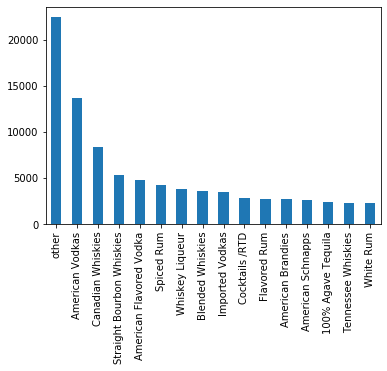

In [21]:
df_cats['cat_name'].value_counts().plot.bar()

In [22]:
df_oh = df_cats.copy()
df_oh = df_oh.join(pd.get_dummies(df_cats['cat_name']))

In [23]:
df_oh.head()

,date,store,city,zip,store_location,county_num,county,cat,cat_name,vendor,...,Canadian Whiskies,Cocktails /RTD,Flavored Rum,Imported Vodkas,Spiced Rum,Straight Bourbon Whiskies,Tennessee Whiskies,Whiskey Liqueur,White Rum,other
0,2018-06-20,Wheatland Day Break,Wheatland,52777.0,POINT (-90.841518 41.82906),23.0,CLINTON,1062400.0,Spiced Rum,DIAGEO AMERICAS,...,0,0,0,0,1,0,0,0,0,0
1,2018-06-20,Hy-Vee Food and Drug / Clinton,Clinton,52732.0,POINT (-90.193204 41.836268000000004),23.0,CLINTON,1031200.0,American Flavored Vodka,JEM Beverage Company,...,0,0,0,0,0,0,0,0,0,0
2,2018-06-20,Wal-Mart 2889 / Clinton,Clinton,52732.0,POINT (-90.245005 41.818874),23.0,CLINTON,1011400.0,Tennessee Whiskies,Brown Forman Corp.,...,0,0,0,0,0,0,1,0,0,0
3,2018-06-20,Hy-Vee Food and Drug / Clinton,Clinton,52732.0,POINT (-90.193204 41.836268000000004),23.0,CLINTON,1081200.0,other,DIAGEO AMERICAS,...,0,0,0,0,0,0,0,0,0,1
4,2018-06-20,Sa Tobacco Liquor Mart,Clinton,52732.0,POINT (-90.193275 41.848124),23.0,CLINTON,1081300.0,other,Prestige Wine & Spirits Group,...,0,0,0,0,0,0,0,0,0,1


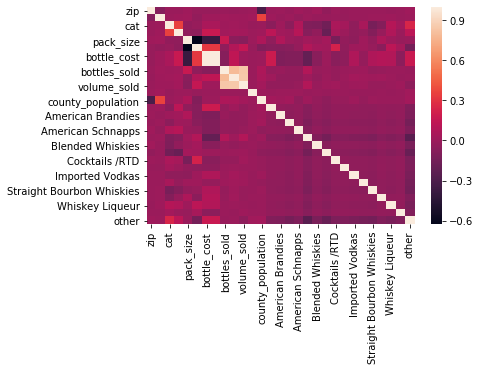

In [24]:
sns.heatmap(df_oh.corr());

## Entering new data

The 2018 estimates!

In [25]:
census = pd.read_csv('Data/Iowa_2018_census.csv')

census = census[census['Year'] == '2018 population estimate']
census = census.drop(['State Name', 'State', 'Sumlev', 'Number of Records', 'Year', 'County', 'Hispanic or Latino origin'], axis=1)
census['County Name'] = census['County Name'].map(lambda x: x.replace(' County', ''))

In [26]:
census['Race'].unique()

array(['Asian alone', 'White alone',
       'American Indian and Alaska Native alone',
       'Native Hawiian and Other Pacific Islander alone', 'All races',
       'Two or more races', 'Black and African American alone'],
      dtype=object)

Idea here is that perhaps the male-female ratios will affect anything?

In [28]:
census.shape

(118503, 5)

In [29]:
census.isnull().sum()

Age group      0
County Name    0
Data           0
Sex            0
Race           0
dtype: int64

In [30]:
df = pd.read_csv('Data/Iowa_Liquor_Sales.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
top_categories = df['Category Name'].value_counts()

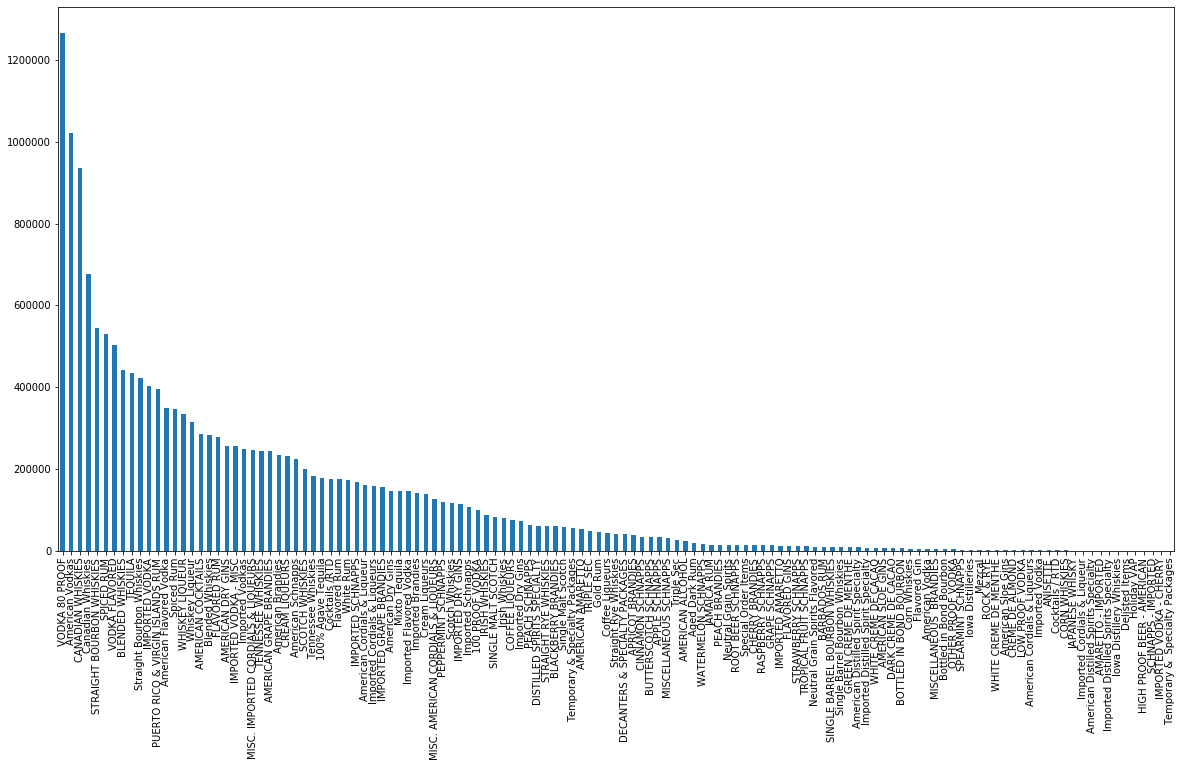

In [42]:
top_categories.plot.bar(figsize=(20,10));

In [33]:
cats2 = list(map(lambda x: x.lower(), list(top_categories.to_dict().keys())))

In [34]:
a = []
for b in [ x.split(' ') for x in cats2]:
    a.extend(b)

In [40]:
categories_series = pd.Series(a)

In [41]:
categories_series.value_counts()

imported        20
whiskies        19
american        19
schnapps        17
vodka           12
&               11
rum             10
brandies         9
liqueurs         8
flavored         8
specialty        8
gins             7
cordials         6
bourbon          6
de               5
spirits          5
proof            5
distilled        5
creme            5
-                5
scotch           4
dry              4
liqueur          4
single           4
straight         4
amaretto         3
cocktails        3
grape            3
packages         3
white            3
                ..
gold             1
agave            1
decanters        1
distilleries     1
anisette         1
100              1
cinnamon         1
mezcal           1
rico             1
vap              1
holiday          1
watermelon       1
delisted         1
mixto            1
rtd              1
apple            1
virgin           1
tropical         1
low              1
gin              1
distillery       1
islands     

In [49]:
categories_final = ['vodka', 'whiskies', 'whisky', 'schnapps', 'brandies', 'gins', 'distilled', 'tequila']

In [48]:
print(top_categories)

VODKA 80 PROOF                          1265974
American Vodkas                         1022097
CANADIAN WHISKIES                        936212
Canadian Whiskies                        676817
STRAIGHT BOURBON WHISKIES                543684
SPICED RUM                               530323
VODKA FLAVORED                           502813
BLENDED WHISKIES                         441610
TEQUILA                                  435298
Straight Bourbon Whiskies                422275
IMPORTED VODKA                           404048
PUERTO RICO & VIRGIN ISLANDS RUM         395376
American Flavored Vodka                  348293
Spiced Rum                               346456
WHISKEY LIQUEUR                          334572
Whiskey Liqueur                          314392
AMERICAN COCKTAILS                       284695
Blended Whiskies                         282835
FLAVORED RUM                             278367
AMERICAN DRY GINS                        256386
IMPORTED VODKA - MISC                   